In [1]:
from qiskit import QuantumCircuit, execute, Aer, BasicAer
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
import numpy as np

In [2]:
# numero de qubits do circuito
n = 4

In [3]:
# inicializando o circuito
qft = QuantumCircuit(n, n, name = "QFT")

for i in range(n-1, -1, -1):
  #começa do último bit que só tem uma porta H
  qft.h(i)
  fase = 0
  for j in range(i):
    #conecta as portas de fase nos bits anteriores
    fase +=1
    qft.cp(np.pi/(2**fase), i - j -1, i)
  #para melhorar a visualização
  qft.barrier()

for i in range(int(n/2)):
  #Operação de swap
  qft.swap(i, n-1-i)


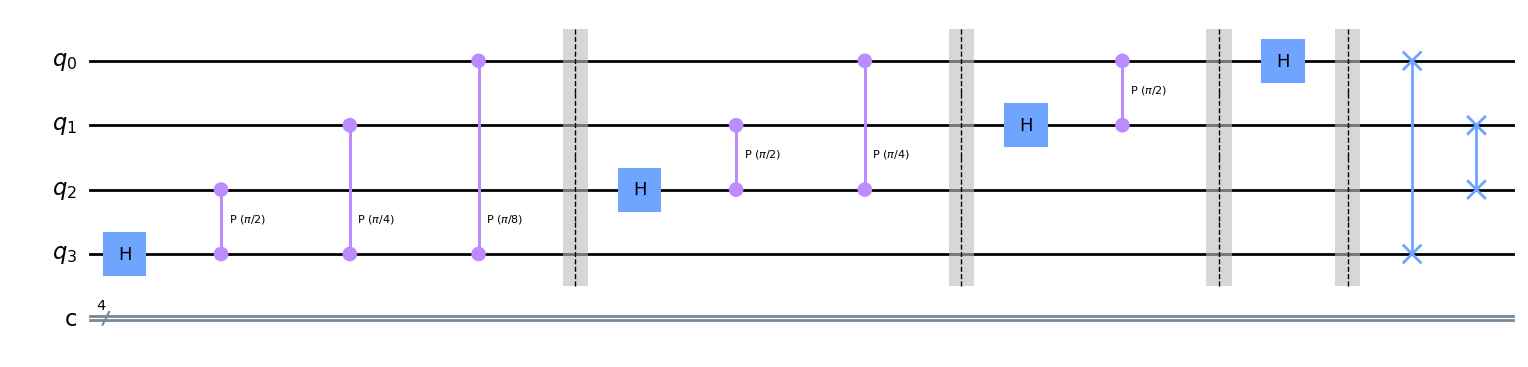

In [4]:
qft.draw('mpl')

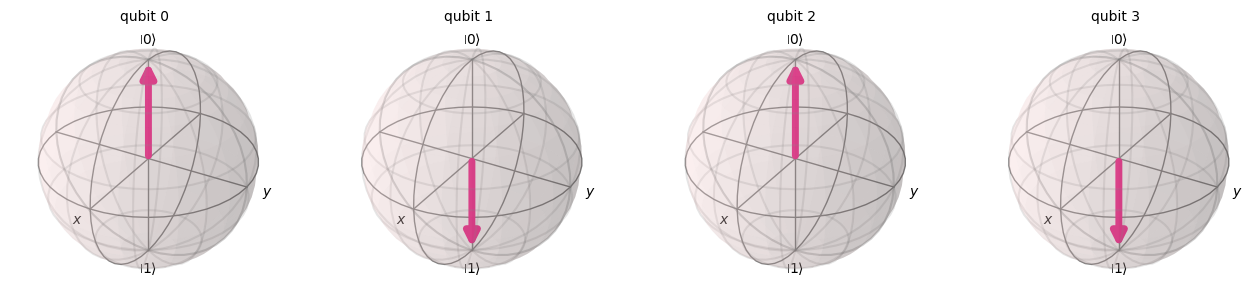

In [6]:


sv = Statevector.from_label("1010")
plot_bloch_multivector(sv)

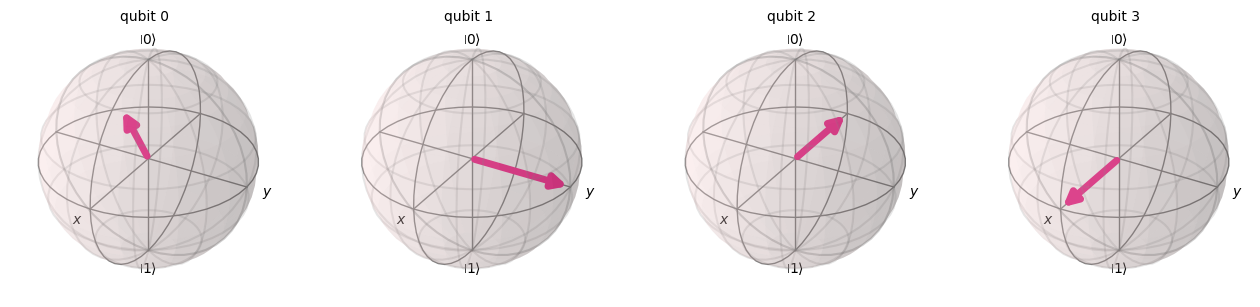

In [7]:
qft_sv = sv.evolve(qft) #aplica a QFT nos qubits
plot_bloch_multivector(qft_sv)